In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(10201, 3)
(6120, 2) (4081, 2) (6120,) (2040,)
(2040, 2) (2041, 2)


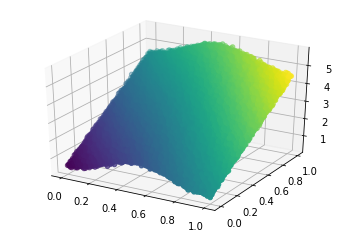

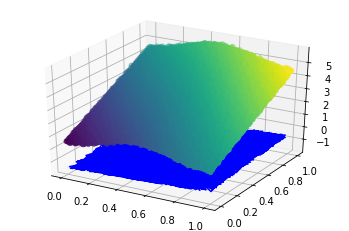

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tqdm import tqdm_notebook

data = pd.read_csv("/content/drive/MyDrive/Assignment 1 Data/Regression/BivariateData/32.csv", header = None)
data.columns = ["X", "Y", "Z"]
print(data.shape)

A = data.iloc[:, 0].values
B = data.iloc[:, 1].values
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1].values

X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, test_size = 0.4, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size = 0.5, random_state = 0)
print(X_train.shape, X_rest.shape, Y_train.shape, Y_val.shape)
print(X_val.shape, X_test.shape)

fig = plt.figure()
  
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
c = A + B
ax.scatter(A, B, Y, c = c)
plt.show()

class FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    #print(self.H,"  --------", self.W)
    
    #print("Shape is",len(self.H))
    #print(len(self.W))
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.A[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Average Error')
      plt.show()

ffsn_multi = FFSN_MultiClass(2,1,[2])
Y_pred = ffsn_multi.predict(X_test)
A_test = X_test[:, 0]
B_test = X_test[:, 1]

fig = plt.figure()
ax = plt.axes(projection ='3d')
c = A + B
ax.scatter(A, B, Y, c = c)
ax.plot3D(A_test, B_test, Y_pred, color = 'b')
plt.show()


